In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iexfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [3]:
from iexfinance.stocks import get_historical_data
import iexfinance as iex

In [4]:
http://finance.yahoo.com/q?s=AAPL

SyntaxError: invalid syntax (<ipython-input-4-993ee5bb2ed5>, line 1)

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [5]:
list_of_tickers = ["SPY", "AGG"]
# YOUR CODE HERE

# Set start and end datetimes of 1 year, between now and 30 years ago.
end_date = datetime.now()
start_date = end_date + timedelta(-365)

#Get 1 year's worth of historical data 
#df= get_historical_data(list_of_tickers, start_date, end_date,close_only=True, output_format='pandas')
#df.head()


In [6]:
#df.reset_index()

In [7]:
#df.to_csv('df')

In [8]:
#pull in saved dataframe
spy_agg_csv = Path("df.csv")

spy_agg = pd.read_csv(spy_agg_csv,parse_dates=True,infer_datetime_format=True)

In [9]:
spy_agg.head(20)

,Unnamed: 0,SPY Close,SPY Volume,AGG Close,AGG Volume
0,date,NaN,NaN,NaN,NaN
1,2019-02-01,270.06,85782524.0,106.97,7227896.0
2,2019-02-04,271.96,60744844.0,106.88,14227726.0
3,2019-02-05,273.10,79552774.0,107.11,8913510.0
4,2019-02-06,272.74,58347791.0,107.05,6449575.0
5,2019-02-07,270.14,95481961.0,107.10,3938913.0
6,2019-02-08,270.47,75788861.0,107.34,4288562.0
7,2019-02-11,270.62,68021423.0,107.23,3521028.0
8,2019-02-12,274.10,72270221.0,107.25,3136691.0
9,2019-02-13,274.99,65277204.0,107.06,2526097.0


In [10]:
spy_agg = spy_agg.dropna()
spy_agg

,Unnamed: 0,SPY Close,SPY Volume,AGG Close,AGG Volume
1,2019-02-01,270.06,85782524.0,106.97,7227896.0
2,2019-02-04,271.96,60744844.0,106.88,14227726.0
3,2019-02-05,273.10,79552774.0,107.11,8913510.0
4,2019-02-06,272.74,58347791.0,107.05,6449575.0
5,2019-02-07,270.14,95481961.0,107.10,3938913.0
...,...,...,...,...,...
248,2020-01-27,323.50,84062463.0,114.14,4790076.0
249,2020-01-28,326.89,63833953.0,114.04,4463823.0
250,2020-01-29,326.62,54040889.0,114.30,2890247.0
251,2020-01-30,327.68,75491844.0,114.31,6885551.0


In [11]:
spy_agg = spy_agg.rename(columns={"Unnamed: 0":"Date"})
spy_agg

,Date,SPY Close,SPY Volume,AGG Close,AGG Volume
1,2019-02-01,270.06,85782524.0,106.97,7227896.0
2,2019-02-04,271.96,60744844.0,106.88,14227726.0
3,2019-02-05,273.10,79552774.0,107.11,8913510.0
4,2019-02-06,272.74,58347791.0,107.05,6449575.0
5,2019-02-07,270.14,95481961.0,107.10,3938913.0
...,...,...,...,...,...
248,2020-01-27,323.50,84062463.0,114.14,4790076.0
249,2020-01-28,326.89,63833953.0,114.04,4463823.0
250,2020-01-29,326.62,54040889.0,114.30,2890247.0
251,2020-01-30,327.68,75491844.0,114.31,6885551.0


In [12]:
spy_agg_df = spy_agg[['Date','SPY Close','AGG Close']]

In [13]:
spy_agg_df = spy_agg_df.dropna()

In [14]:
spy_agg_df 

,Date,SPY Close,AGG Close
1,2019-02-01,270.06,106.97
2,2019-02-04,271.96,106.88
3,2019-02-05,273.10,107.11
4,2019-02-06,272.74,107.05
5,2019-02-07,270.14,107.10
...,...,...,...
248,2020-01-27,323.50,114.14
249,2020-01-28,326.89,114.04
250,2020-01-29,326.62,114.30
251,2020-01-30,327.68,114.31


In [15]:
spy_agg_df.set_index(['Date'], inplace=True)

In [16]:
spy_agg_df.index = pd.to_datetime(spy_agg_df.index)

In [17]:
spy_agg_df.head(10)

,SPY Close,AGG Close
Date,,
2019-02-01,270.06,106.97
2019-02-04,271.96,106.88
2019-02-05,273.10,107.11
2019-02-06,272.74,107.05
2019-02-07,270.14,107.10
2019-02-08,270.47,107.34
2019-02-11,270.62,107.23
2019-02-12,274.10,107.25
2019-02-13,274.99,107.06


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

In [18]:
# Calculate the daily roi for the stocks
# YOUR CODE HERE
spy_agg_daily_rtn = spy_agg_df.pct_change()
spy_agg_daily_rtn = spy_agg_daily_rtn.dropna()
spy_agg_daily_rtn


,SPY Close,AGG Close
Date,,
2019-02-04,0.007035,-0.000841
2019-02-05,0.004192,0.002152
2019-02-06,-0.001318,-0.000560
2019-02-07,-0.009533,0.000467
2019-02-08,0.001222,0.002241
...,...,...
2020-01-27,-0.016029,0.003076
2020-01-28,0.010479,-0.000876
2020-01-29,-0.000826,0.002280


In [19]:

# Use the `mean` function to calculate the mean of daily returns for `JNJ` and `MU`, respectively
avg_daily_return_spy = spy_agg_daily_rtn.mean()['SPY Close']
avg_daily_return_agg = spy_agg_daily_rtn.mean()['AGG Close']
avg_daily_return_agg

0.00027840613118700216

In [20]:
avg_daily_return_spy

0.0007258594971833797

In [21]:
# Calculate volatility
# YOUR CODE HERE
spy_std = spy_agg_daily_rtn.std()['SPY Close']
agg_std = spy_agg_daily_rtn.std()['AGG Close']
spy_std

0.0075014610182649235

In [22]:
# Save the last day's closing price
# YOUR CODE HERE   [-1]

last_day_spy = spy_agg_df['SPY Close'][-1]
last_day_agg = spy_agg_df['AGG Close'][-1]


In [23]:
# Setup the Monte Carlo Parameters  
number_simulations = 500
number_records = 252 * 30
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [24]:
# Run the Monte Carlo Simulation
for x in range(number_simulations):
    
    simulated_spy_prices = [last_day_spy]
    simulated_agg_prices = [last_day_agg]
    
    # Simulate the returns for 30 Years
    for i in range(number_records):
        
        # Calculate the simulated price using the last price within the list
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_return_spy,spy_std))
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_return_agg,agg_std))
        
        
        # Append the simulated price to the list
        simulated_spy_prices.append(simulated_spy_price)
        simulated_agg_prices.append(simulated_agg_price)
    
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df["SPY prices"] = pd.Series(simulated_spy_prices)
    simulated_price_df["AGG prices"] = pd.Series(simulated_agg_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (60% SPY; 40% AGG)
    weights = [0.60, 0.40]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[f"Simulation {x+1}"] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
portfolio_cumulative_returns.head()
   


,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 491,Simulation 492,Simulation 493,Simulation 494,Simulation 495,Simulation 496,Simulation 497,Simulation 498,Simulation 499,Simulation 500
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002668,0.996032,0.993714,0.999739,1.005366,1.006485,1.008857,0.996639,1.001745,0.999214,...,1.002049,0.995961,1.006876,1.000034,0.997829,1.002955,0.996462,0.994291,1.002928,0.997489
2,1.007403,0.999752,0.993104,0.998788,1.008471,0.997966,1.003646,0.986638,1.001017,1.007189,...,1.004088,1.002926,1.009848,1.001648,0.999210,0.999944,0.996040,0.994752,1.002877,1.001104
3,1.006697,0.999836,0.996473,0.993373,1.007888,1.000872,1.007376,0.980992,1.000857,1.015020,...,1.004172,1.005504,1.014310,1.003125,0.993012,0.998832,0.999636,1.000061,1.006122,1.000070
4,1.015042,1.002635,0.993177,0.998934,1.009390,0.996222,1.006292,0.978392,1.008371,1.005533,...,1.005992,1.003891,1.013013,1.008013,0.998892,0.996043,0.994356,1.000796,1.010453,1.003434


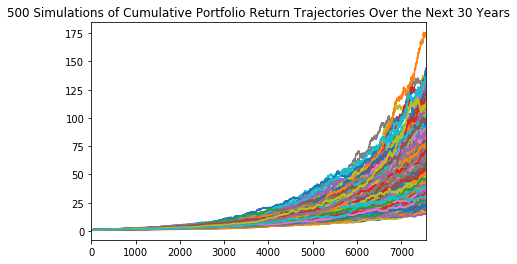

In [25]:
# Visualize the Simulation 
# YOUR CODE HERE

plot_title = f"{x+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 30 Years"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)

In [26]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
# YOUR CODE HERE
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.head()

Simulation 1    66.050224
Simulation 2    54.922776
Simulation 3    74.186481
Simulation 4    77.739248
Simulation 5    71.049007
Name: 7560, dtype: float64

In [27]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
# YOUR CODE HERE

In [28]:
# Display the 90% confidence interval for the ending returns
# YOUR CODE HERE
confidence_interval = ending_cumulative_returns.quantile(q=[0.10, 0.90])
confidence_interval

0.1    35.298070
0.9    91.199884
Name: 7560, dtype: float64

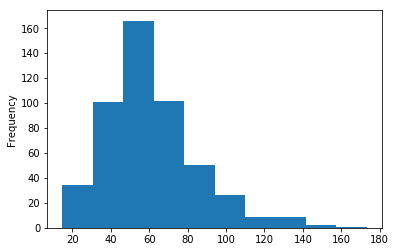

In [29]:
# Visualize the distribution of the ending returns
# YOUR CODE HERE
ending_cumulative_returns.plot(kind='hist', bins=10)

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [33]:
# YOUR CODE HERE
quantile_returns = ending_cumulative_returns.quantile([0.1, 0.5, 0.9])
quantile_returns

0.1    35.298070
0.5    56.128124
0.9    91.199884
Name: 7560, dtype: float64

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [47]:
initial_investment = 20000
expected_portfolio_returns = initial_investment * ending_cumulative_returns
expected_portfolio_returns

expected_quantile_return = expected_portfolio_returns.quantile([0.1, 0.5, 0.9])
expected_quantile_return

#Don't know how to put it into dollars

0.1    7.059614e+05
0.5    1.122562e+06
0.9    1.823998e+06
Name: 7560, dtype: float64

### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [ ]:
# YOUR CODE HERE
#Don't know how

### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [ ]:
# YOUR CODE HERE
#Don't know how

### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE
#Don't know how